In [2]:
import pandas as pd

names1880 = pd.read_csv('C:/Users/user/Desktop/pydata-book-2nd-edition/names/yob1880.txt', 
                        names=['name','sex','births'])

# txt 파일 불러오는 방법은 csv 컬럼으로 name sex births 를 할당했다.

In [3]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
# 이 데이터는 각 연도별로 최소 5명 이상 중복되는 이름만 포함하고 있다.
# 따라서 편의상 성별 출생수를 모두 합한 값을 해당 연도의 전체 출생수라고 가정하자

In [6]:
names1880.groupby('sex').births.sum()
# names1880 데이터를 groupby 로 합치는데 sex 를 인덱스로 births 를 밸류로 주고 밸류값을
# 합해서 결과값으로 보여준다.

sex
F     90994
M    110490
Name: births, dtype: int64

In [ ]:
# 자료가 연도별 파일로 나눠져 있으니 먼저 모든 데이터를 DataFrame 하나로 모든 다음
# year 항복을 추가한다 pandas.concat 을 이용하면 이 작업을 쉽게 할 수 있다.

In [56]:
years = range(1880, 2019)
# range 함수로 1880 부터 2018년 데이터를 하나씩 가져온다.

pieces = [] 
# pieces 리스트를 만들어 나중에 나오는 값들을 이 곳에 넣을거다.
columns = ['name', 'sex', 'births']

for year in years:
    # range 값을 하나씩 year 에 넣어 for 루프를 돌린다.
    path = f'C:/Users/user/Desktop/pydata-book-2nd-edition/names/yob{year}.txt'
    # 폴더 안에 있는 파일들을 year 기준으로 할당하는.path 변수를 만든다.
    frame = pd.read_csv(path, names=columns)
    # coulmns 3개의 인자를 기준으로 해서 path 에 있는 값을 csv 방식으로 읽어 frame 변수에 할당한다.
    
    frame['year'] = year
    # frmae 변수에 year colume 을 새로 만든다.
    pieces.append(frame)
    # pieces 리스트에 frame 값을 하나씩 뒤에서부터 넣는다.

# 모두 하나의 DataFrame 으로 합치기
names = pd.concat(pieces, ignore_index=True)

# concat 은 배열 결합
# pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
#           keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)

# axis : 축
# join : 조인방법
# join_axes : 조인 축 지정
# keys : 원본데이터 이름 지정
# ignore_index : 중복되는 로우 이름 색인 무시 여부

In [57]:
# 여기서 두가지 언급해야 할 내용이 있다. 첫째, concat 메서드는 DataFrame 개체를 합쳐준다.
# 둘째, read_csv로 읽어온 원래 로우 순서는 몰라도 되니 concat 메서드에 
# ignore_index=True 를 인자로 전달해야 한다. 이렇게 해서 전체 이름 데이터를 담고 있는
# 거대한 DataFrame 객체를 만들었다.

In [58]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


In [15]:
# 이제 이 데이터에 groupby 나 pivot_table 을 이용해서 연도나 성별에 따른
# 데이터를 수집할 수 있다.

In [16]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

# .pivot_table
# 테이블의 요약된 정보 출력
# data.pivot_table(values=None, index=None, columns=None, aggfunc='mean',
#                  fill_value=None, margins=False, dropna=True, margins_name='All')

#  index: index 색인으로 사용될 컬럼
# columns : column 색인으로 사용될 컬럼
# aggfunc : 데이터 축약 시 사용할 함수(mean, sum, count..)
# margins : 행/열별 총 합

# .pivot 
# 데이터 테이블 재배치(구조 변경)
# 여러 column 을 index, values, columns 값으로 사용 가능 
# Group 연산, 테이블 요약, 그래프 등을 위해 사용
# set_indx 로 계층적 색인 생성 후, unstack 메서드로 형태를 변경하는 과정의 축약형

# p1.pivot(index=None, columns=None, values=None)
# index: index 색인으로 사용될 컬럼
# columns : column 색인으로 사용될 컬럼
# values : values 에 채우고자 하는 컬럼

In [17]:
total_births.tail()

sex,F,M
year,,
2014,1782350,1916564
2015,1780453,1911537
2016,1766212,1891585
2017,1719138,1842837
2018,1686961,1800392


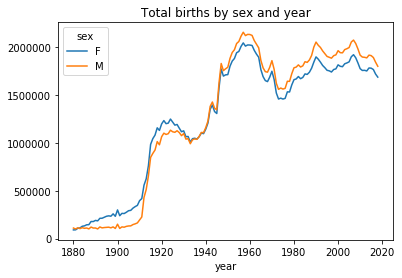

In [18]:
total_births.plot(title='Total births by sex and year')

# DataFrame.plot.bar()  막대그래프
# DataFrame.plot.line()  선그래프
# DataFrame.plot.scatter(x, y)  산포도그래프
# DataFrame.plot.box() Box 그래프

In [19]:
# 다음은 prop 컬럼을 추가해서 각 이름이 전체 출생수에서 차지하는 비율을 계산하자
# prop 값이 0.02 라면 100명의 아기 중 2명의 이름이 같다는 뜻이다.
# 데이터를 연도와 성별로 그룹화하고 각 그룹에 새 컬럼을 추가하자

In [165]:
def add_prop(group):
    # add_prop 함수를 만들고 매개인자로 group 을 받겠다.
    group['prop'] = group.births / group.births.sum()
    # group 변수에 prop 컬럼을 새로 만들고, group.births 값을 그 합으로 나누겠다.
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
# names 에 있는 year 과 sex 컬럼의 값을 apply 함수를 이용해 add_prop 함수에 적용한 결과값을
# names 변수에 할당한다.즉 결과값이 prop 컬럼에 새롭게 생긴다.

In [166]:
# 이제 새로운 prop 칼럼이 추가되었다.

In [167]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1957041,Zylas,M,5,2018,0.000003
1957042,Zyran,M,5,2018,0.000003
1957043,Zyrie,M,5,2018,0.000003
1957044,Zyron,M,5,2018,0.000003


In [168]:
# 그룹 관련 연산을 수행할 때는 모든 그룹에서 prop 컬럼의 합이 1이 맞는지 확인하는 
# 새너티 테스트를 하는게 좋다..

In [169]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2016  M      1.0
2017  F      1.0
      M      1.0
2018  F      1.0
      M      1.0
Name: prop, Length: 278, dtype: float64

In [170]:
# 이제 모든 준비가 끝났고, 분석에 사용할 각 연도별/성별에 따른 선호하는 이름
# 1000개를 추출하자. 이것 역시 그룹 연산이다.

In [171]:
def get_top1000(group):
    # get_top1000 함수를 만들고 매개인자로 group 값을 받겠다.
    return group.sort_values(by='births', ascending=False)[:100]
    # return 값은 group 값을 sort_values 메서드를 사용하여 births 를 기준으로 내림차순하여 
     # 처음부터 100번까지의 값을 구한다 (제일 많은 수부터 100번째까지)
    # sort.valutes 는 컬럼의 값을 기준으로 데이터를 정렬한다.
     # sort.index 는 키의 값을 기준으로 데이터를 정렬한다.
        
grouped = names.groupby(['year', 'sex'])
# names에 있는 year 과 sex 의 값을 묶어 grouped 에 할당한다. 
# groupby 는 같은 값을 하나로 묶어 통계 또는 집계 결과를 얻기 위해 사용하는 것

top1000 = grouped.apply(get_top1000)
# grouped 값을 get_top1000 함수의 매개인자에 넣어 나온 결과값을 top1000 에 할당한다. 

# 그룹 색인은 필요없으므로 삭제
top1000.reset_index(inplace=True, drop=True)

# 인덱스를 리셋 시키는데 사용한다.
# 기본값으로 인덱스 값들을 DataFrame의 열로 전송하여, 새로운 단순한 정수 인덱스를 세팅한다.
# 즉, 이 메서드는 set_index() 의 기능을 역으로 수행한다.

# DataFrame.reset_index(drop=False, inplace=False)
# drop 은 인덱스로 세팅한 열을 DataFrame 내에서 삭제할지 여부를 결정한다
# inplace 는 원본 객체를 변경할지 여부를 결정한다.

In [172]:
print(grouped)

In [173]:
#함수를 정의하지 않고 직접 추출하고 싶다면 다음처럼 할 수도 있다.

In [174]:
pieces = []
# pieces 라는 변수를 만들어 빈 리스트를 만든다.

for year, group in names.groupby(['year', 'sex']):
    # names 의 year sex 값을 묶은 groupby 값을 births 기분으로 내림차순하여 
    # 첫번째값부터 1000번째까지 값을 pieces 에 리스트 형식으로 할당한다..
    
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
    
top1000 = pd.concat(pieces, ignore_index=True)
# pieces 리스트 값을 인덱스 무시 즉, 다시 처음부터 인덱스값을 대입하고
# concat 을 이용해서 데이터프레임을 전부 합쳐준다.

In [175]:
print(pieces)

[          name sex  births  year      prop
0         Mary   F    7065  1880  0.077642
1         Anna   F    2604  1880  0.028617
2         Emma   F    2003  1880  0.022012
3    Elizabeth   F    1939  1880  0.021309
4       Minnie   F    1746  1880  0.019188
..         ...  ..     ...   ...       ...
866   Georgina   F       5  1880  0.000055
865      Genie   F       5  1880  0.000055
863      Etter   F       5  1880  0.000055
862      Estie   F       5  1880  0.000055
941      Wilma   F       5  1880  0.000055

[942 rows x 5 columns],           name sex  births  year      prop
942       John   M    9655  1880  0.087383
943    William   M    9532  1880  0.086270
944      James   M    5927  1880  0.053643
945    Charles   M    5348  1880  0.048403
946     George   M    5126  1880  0.046393
...        ...  ..     ...   ...       ...
1880      Cleo   M       5  1880  0.000045
1881  Crockett   M       5  1880  0.000045
1882     Cyril   M       5  1880  0.000045
1883     Daisy   M       5  

In [176]:
# 이제 데이터셋의 크기가 조금 줄었다.

In [177]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
277872,Korbyn,M,207,2018,0.000115
277873,Randall,M,207,2018,0.000115
277874,Benton,M,206,2018,0.000114
277875,Coleman,M,206,2018,0.000114


In [178]:
# 이렇게 추출한 상위 1000개의 이름 데이터는 이어지는 분석에서 사용한다.

In [179]:
# 전체 데이터셋과 상위 1000개의 이름 데이터로 흥미로운 이름 유행을 분석해보자
# 먼저 상위 1000개의 데이터를 남자와 여자로 분리한다.

In [180]:
boys = top1000[top1000.sex =='M']
girls = top1000[top1000.sex =='F']

In [181]:
# 연도별로 John 이나 Marry 라는 이름의 추이를 간단하게 그래프로 그릴 수 있는데,
# 그전에 데이터를 살짝 변경할 필요학 있다. 연도와 이름에 대한 전체 출생수를 피벗테이블로 만들자

In [182]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
# 밸류 값으로 births 를 주고 연도 이름 인덱스 컬럼의 합을 가진 값을 total_births 변수에 
# 할당한다.



# .pivot_table
# 테이블의 요약된 정보 출력
# data.pivot_table(values=None, index=None, columns=None, aggfunc='mean',
#                  fill_value=None, margins=False, dropna=True, margins_name='All')

#  index: index 색인으로 사용될 컬럼
# columns : column 색인으로 사용될 컬럼
# aggfunc : 데이터 축약 시 사용할 함수(mean, sum, count..)
# margins : 행/열별 총 합

In [183]:
# DataFrame 의 plot 메서드를 사용해서 몇몇 이름의 추이를 그래프로 그려보자

In [184]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 7174 entries, Aaden to Zyaire
dtypes: float64(7174)
memory usage: 7.6 MB


In [185]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E032B50C8>,
      dtype=object)

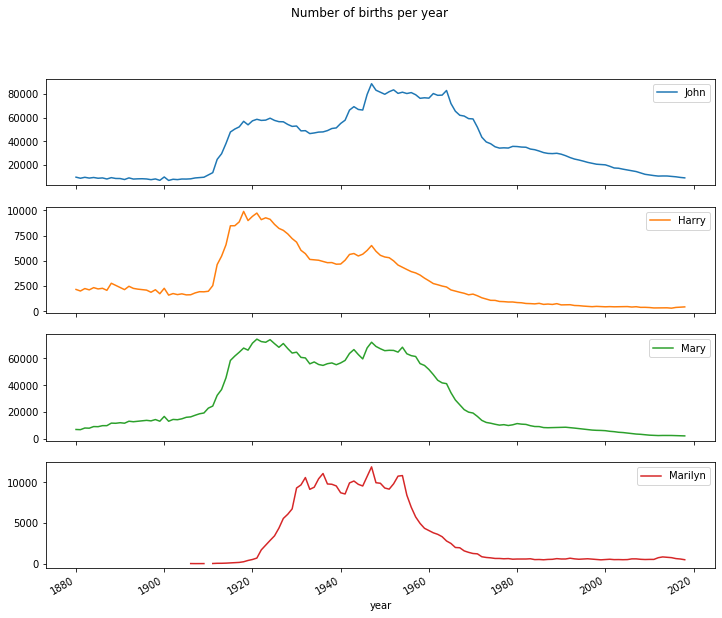

In [186]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

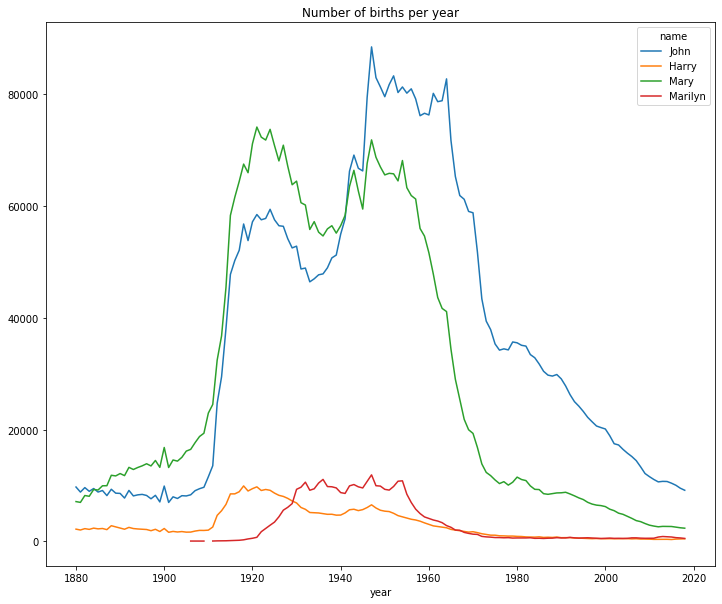

In [187]:
subset.plot(subplots=False, figsize=(12, 10), grid=False, title="Number of births per year")

In [188]:
# 그래프를 보면 예로 든 이름들이 최근 미국에서 인기가 없다는 걸 알 수 있다. 
# 하지만 단순히 이렇게 결론을 내기에는 조금 복잡한데 이 부분은 다음 절에서 살펴본다.

In [189]:
# 다양한 이름을 사용하는 경향 측정하기
# 위에서 확인한 그래프의 감소 추세는 부모가 아이의 이름을 지을 때 흔한 이름은
# 기피한다고 해석할 수 있다. 이 가설은 데이터에서 살펴볼 수 있으며 확인이 가능하다.
# 좀 더 자세히 알아보기 위해 인기 있는 이름 1000개가 전체 출생수에서 차지하는 비율을
# 연도별/성별 그래프로 그려보자

In [190]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

# prop 을 기준 값으로 year sex 인덱스 컬럼 의 합을 table 변수에 핟당한다.

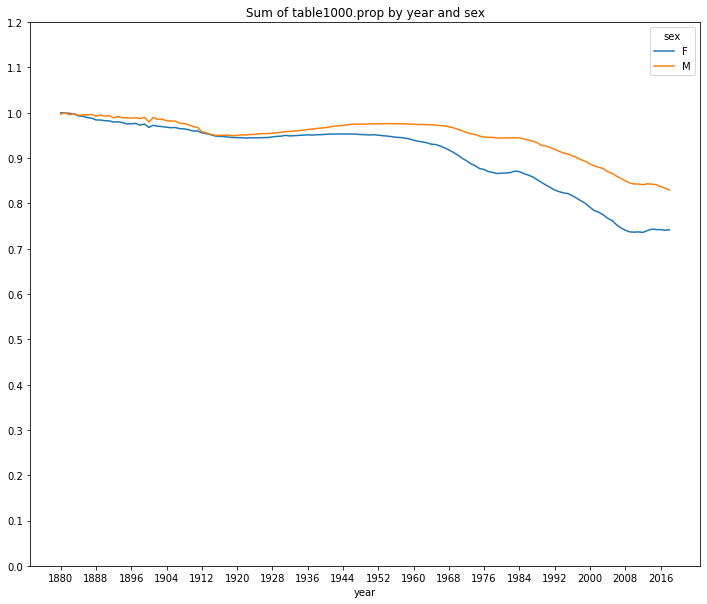

In [197]:
import numpy as np

table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0,1.2,13), xticks=range(1880, 2018, 8), figsize=(12, 10))

# linspace 함수는 1차원의 배열 만들기, 그래프 그리기에서 수평축의 간격 만들기 등에
# 매우 편리하게 사용 가능

# Linearly Spaced 의 줄임말.
# x = np.linspace(start, stop, num) 
# start 는 배열의 시작값, stop은 배열의 끝 값,num은 start와 stop 사이를 
# 몇 개의 일정한 간격으로 요소를 만들 것인지를 나타내는 것.
# 만일 num을 생략하면 Dafault 로 50개의 수열 즉, 1차원 배열을 만들어준다.

# endpoint=True, Defalut 값은 True, stop 으로 주어진 값을 포함시킬 것인지 아닌지
# 선택하는 옵션

In [67]:
# 그림에서 확인할 수 있듯이 실제로 이름의 다양성이 증가하고 있음을 보여준다
# 상위 1000개의 이름에서 비율의 총합이 감소하고 있다.
# 또한 인기 있는 이름순으로 정렬했을 때 전체 출생수의 50% 를 차지하기까지 등장하는 이름수도 흥미롭다

In [76]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,22127,2010,0.011546
260878,Ethan,M,18002,2010,0.009393
260879,Michael,M,17350,2010,0.009053
260880,Jayden,M,17179,2010,0.008964
260881,William,M,17051,2010,0.008897
...,...,...,...,...,...
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102
261875,Joziah,M,196,2010,0.000102


In [77]:
df2018 = boys[boys.year == 2018]
df2018

,name,sex,births,year,prop
276877,Liam,M,19837,2018,0.011018
276878,Noah,M,18267,2018,0.010146
276879,William,M,14516,2018,0.008063
276880,James,M,13525,2018,0.007512
276881,Oliver,M,13389,2018,0.007437
...,...,...,...,...,...
277872,Korbyn,M,207,2018,0.000115
277873,Randall,M,207,2018,0.000115
277874,Benton,M,206,2018,0.000114
277875,Coleman,M,206,2018,0.000114


In [73]:
# prop 을 내림차순으로 정렬하고 나서 전체의 50%가 되기까지 얼마나 많은 이름이 등장하는지
# 알아보자. for 문을 사용해서 구현할 수도 있지만, 벡터화된 Numpy 를 사용하는 편이 
# 조금 더 편하다. prop 의 누계를 cumsum 에 저장하고 searchsorted 메서드를 호출해서
# 정렬된 상태에서 누계가 0.5 가 되는 위치를 구한다.

In [80]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011546
260878    0.020939
260879    0.029992
260880    0.038956
260881    0.047853
260882    0.056596
260883    0.065180
260884    0.073447
260885    0.081554
260886    0.089638
Name: prop, dtype: float64

In [81]:
prop_cumsum.values.searchsorted(0.5)
# 인기많은 이름 순서대로 1000개 를 정렬했을때 전체 이름이 차지하는 비율이 50%가 될때까지
# 116등까지의 이름이 필요했다.

116

In [198]:
prop_cumsum = df2018.sort_values(by='prop', ascending=False).prop.cumsum()
# prop: 각 이름이 전체 출생수에서 차지하는 비율
prop_cumsum[:10]

276877    0.011018
276878    0.021164
276879    0.029227
276880    0.036739
276881    0.044176
276882    0.051608
276883    0.058766
276884    0.065756
276885    0.072663
276886    0.079523
Name: prop, dtype: float64

In [79]:
prop_cumsum.values.searchsorted(0.5)
# 인기많은 이름 순서대로 1000개 를 정렬했을때 전체 이름이 차지하는 비율이 50%가 될때까지
# 148등까지의 이름이 필요했다.

148

In [82]:
# 배열은 색인은 0부터 시작하기 때문에 결과에 1을 더해주면 117이 나온다.
# 1900년에는 이보다 더 낮았다.

In [83]:
df = boys[boys.year == 1900]

In [84]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [85]:
in1900.values.searchsorted(0.5) + 1

25

In [86]:
# 이제 이 연산을 각 연도별/성별 조합에 적용할 수 있다.
# 연도와 성을 groupby 로 묶고 각 그룹에 apply 를 사용해서 이 연산을 적용하면 된다.

In [206]:
def get_quantile_count(group, q=0.5):
    # get_quantile_count 함수를 설정하고  매개변수로 group 을 받고 q 는 0.5 로 값을 받는다.
    group = group.sort_values(by='prop', ascending=False)
    # group 값을 prop 의 values 값을 기준으로 내림차순 정리하여 group 변수에 할당한다.
    return group.prop.cumsum().values.searchsorted(q) + 1
    # values 결과 누적값이 0.5 (50%) 가 되는 내림차순의 등수까지 구해 리턴해준다. 
print(group)

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
# top1000의 year sex 를 묶어 위 함수에 적용해서 나온 결과값을 diversity 변수에 할당한다.
print(diversity)
diversity = diversity.unstack('sex')
# sex를 밸류값으로 unstack 해서 결과값을 diversity 에 할당한다. 

            name sex  births  year      prop
1943042     Liam   M   19837  2018  0.011018
1943043     Noah   M   18267  2018  0.010146
1943044  William   M   14516  2018  0.008063
1943045    James   M   13525  2018  0.007512
1943046   Oliver   M   13389  2018  0.007437
...          ...  ..     ...   ...       ...
1957041    Zylas   M       5  2018  0.000003
1957042    Zyran   M       5  2018  0.000003
1957043    Zyrie   M       5  2018  0.000003
1957044    Zyron   M       5  2018  0.000003
1957045    Zzyzx   M       5  2018  0.000003

[14004 rows x 5 columns]
year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2016  M      139
2017  F      254
      M      143
2018  F      259
      M      149
Length: 278, dtype: int64


In [93]:
# 연산 결과인 diversity DataFrame 은 이제 각 성별에 따라 연도별로
# 색인된 두 개의 시계열 데이터를 담고 있다.

In [207]:
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2014,242,131
2015,243,135
2016,249,139


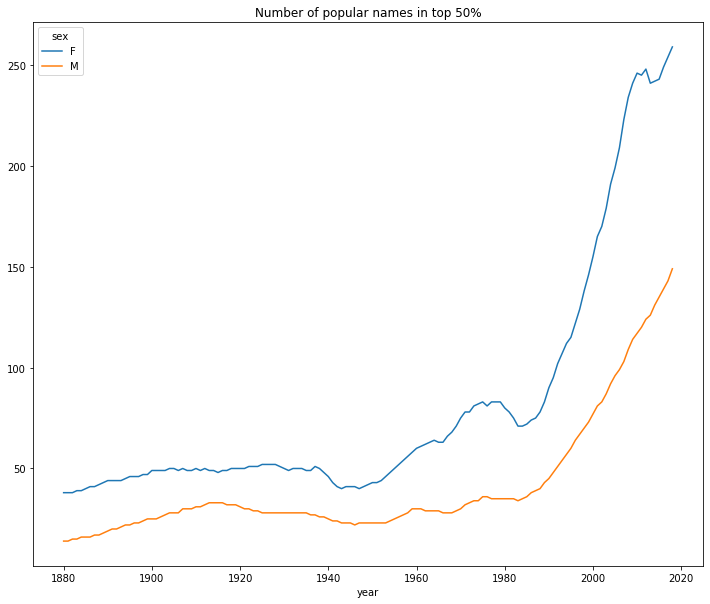

In [97]:
diversity.plot(title='Number of popular names in top 50%', figsize=(12, 10))
# 139 년간 가장 인기 있는 이름의 비율을 내림차순으로 하여 순위를 정했는데
# 전체 값 중 50% 를 차지할때까지 걸렸던 순위 변화를 나타내준다.
# 점점 더 많은 이름을 사용한다는 것을 그래프를 보면 알 수 있다.
# 1880 년에는 인기이름 이름이 대부분 비슷했기에 38개의 이름만으로 전체 이름의 50%를
# 차지할 수 있었는데
# 2018년에는 259명의 이름이 필요했다 (여자) 남자는 14 -> 149

In [99]:
# 보다시피 여자아이의 이름은 항상 남자아이 이름보다 더 다양하며,
# 시간이 흐를수록 더욱 다양해지고 있다. 대체되는 철자의 증가 같은 다양성을 높이는
# 요인에 대한 자세한 분석은 여러분의 몫으로 남겨두겠다

In [100]:
# '마지막 글자' 의 변화
# 2007년 아이 이름을 연구하는 로라 와튼버그는 지난 100년 동안 남자아이 이름의 
# 마지막 글자의 분포에 중요한 변화가 있었다고 자신의 웹사이트에 게재했다.
# 지금부터 전체 자료에서 연도, 성별, 이름의 마지막 글자를 수집해서 이를 확인해보자

In [211]:
#name 컬럼에서 마지막 글자를 추출한다.

get_last_letter = lambda x: x[-1]
# lambda 함수를 이용해서 x 에 x의 마지막 글자를 뽑아 내는 함수를 만들어
# get_last_lettter 변수에 할당한다
last_letters = names.name.map(get_last_letter)
# names 의 name 컬럼에 있는 값들 중 마지막 글자를 뽑아 map 함수를 적용시켜
# 결과를 반환하여 last_letters 에 할당한다.


# last_letters = names.name.map(lambda x: x[-1])

# map은 list의 element에 함수를 적용시켜 결과를 반환하고 싶을 때 사용
# 여러 개의 데이터를 한 번에 다른 형태로 변환하기 위해서 사용된다.
print(last_letters)

last_letters.name = 'last_letter'
# last_letter 라는 컬럼을 따로 만든다.
print(last_letters.name)
table = names.pivot_table('births', index=last_letters,
                         columns=['sex', 'year'], aggfunc=sum)
# births 를 기준값으로 인덱스에 last_letters 와 컬럼으로 sex year을 놓고 합한 값을 
# table 에 할당한다.

print(table)

0          y
1          a
2          a
3          h
4          e
          ..
1957041    s
1957042    n
1957043    e
1957044    n
1957045    x
Name: name, Length: 1957046, dtype: object
last_letter
sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0  

In [102]:
# 이제 전체 기간 중 세 지점을 골라 이름의 마지막 글자 몇 개를 출력해보자
# 1910, 1960, 2010 을 골랐다.

In [226]:
subtable = table.reindex(columns=[1910, 1960, 2010, 2018], level='year')
# map 으로 나온 각 마지막 글자의 모음들을 인덱스로 다시 만들어 해당 연도를 컬럼으로 잡아준다.
# 대신 여기서 컬럼으로 잡은 연도들은 단순히 컬럼이라는 이름을 갖는것뿐이지 의미를 갖진 않는다.
# level 로 year 에 해당하는 정보를 가져오라는 의미를 줘야지만 진짜 컬럼으로의 의미를 갖는다.

# levle int, str, tuple, list 
# 기본값은 None 으로 입력되어 있다.
# 인덱스로부터 주어진 단계를 제거한다
# 기본값으로는 모든 단계를 제가한다.

subtable

sex                 F                                      M            \
year             1910      1960      2010      2018     1910      1960   
last_letter                                                              
a            108399.0  691261.0  676865.0  646970.0    977.0    5212.0   
b                 NaN     694.0     455.0     576.0    411.0    3912.0   
c                 5.0      49.0     956.0    1115.0    482.0   15454.0   
d              6751.0    3731.0    2642.0    3516.0  22113.0  262116.0   
e            133601.0  435030.0  316764.0  300769.0  28665.0  178768.0   
f                 NaN      20.0      97.0     210.0    152.0    9230.0   
g                57.0     318.0     669.0     716.0    439.0   20230.0   
h             20432.0   73241.0  134877.0  118733.0   8849.0   80840.0   
i               605.0   80814.0   56276.0   67234.0    164.0    1295.0   
j                 NaN       NaN     165.0     156.0      NaN       NaN   
k                48.0     314.0     631.0     544.0   7104.0  105284.0   
l             17124.0   68476.0   46853.0   37907.0  12628.0  223641.0   
m               476.0   17417.0    4610.0    5861.0  11273.0   72142.0   
n             31418.0  264228.0  248655.0  200880.0  27847.0  325214.0   
o               663.0    4932.0    2214.0    2890.0   3314.0   27377.0   
p                 7.0      47.0      35.0     106.0    616.0   12096.0   
q                 NaN       NaN      53.0      59.0      NaN       NaN   
r              5311.0   13680.0   32032.0   53254.0  12521.0   66180.0   
s             15478.0   25810.0   23677.0   19829.0  25404.0  218984.0   
t             10877.0   30734.0   13918.0   23974.0  14155.0  139972.0   
u               271.0    1162.0     739.0     935.0     24.0     121.0   
v                 NaN     122.0     208.0     456.0     22.0      77.0   
w                 8.0      63.0    2111.0    5998.0   1228.0   16433.0   
x                 6.0      74.0    1295.0    3006.0    770.0    3946.0   
y             44002.0  308463.0  207305.0  190210.0  15021.0  343238.0   
z               966.0    1330.0    1243.0    1057.0     33.0     393.0   

sex                              
year             2010      2018  
last_letter                      
a             28868.0   30691.0  
b             39276.0   22563.0  
c             23348.0   19338.0  
d             44828.0   41585.0  
e            130253.0  119409.0  
f              2312.0    2740.0  
g              2696.0    5054.0  
h             99303.0   96531.0  
i             43447.0   50934.0  
j              1479.0    1431.0  
k             35518.0   36086.0  
l            135029.0  116983.0  
m             47349.0   58956.0  
n            694587.0  600817.0  
o             81580.0   96794.0  
p              2431.0    2389.0  
q               345.0     433.0  
r            167498.0  168630.0  
s            124871.0  131671.0  
t             43812.0   57910.0  
u              2354.0    4653.0  
v              2777.0    3074.0  
w             31012.0   19602.0  
x             16475.0   20893.0  
y            111524.0   87856.0  
z              3504.0    3369.0

In [227]:
# 그다음에는 전체 출생수에서 성별별로 각각의 마지막 글자가 차지하는 
# 비율을 계산하기 위해 전체 출생수로 정규화하자

In [228]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022010.0
     2010    1775345.0
     2018    1686961.0
M    1910     194212.0
     1960    2132155.0
     2010    1916476.0
     2018    1800392.0
dtype: float64

In [229]:
letter_prop = subtable / subtable.sum()

In [230]:
letter_prop

sex                 F                                       M            \
year             1910      1960      2010      2018      1910      1960   
last_letter                                                               
a            0.273386  0.341868  0.381258  0.383512  0.005031  0.002444   
b                 NaN  0.000343  0.000256  0.000341  0.002116  0.001835   
c            0.000013  0.000024  0.000538  0.000661  0.002482  0.007248   
d            0.017026  0.001845  0.001488  0.002084  0.113860  0.122935   
e            0.336947  0.215147  0.178424  0.178290  0.147596  0.083844   
f                 NaN  0.000010  0.000055  0.000124  0.000783  0.004329   
g            0.000144  0.000157  0.000377  0.000424  0.002260  0.009488   
h            0.051530  0.036222  0.075972  0.070383  0.045564  0.037915   
i            0.001526  0.039967  0.031699  0.039855  0.000844  0.000607   
j                 NaN       NaN  0.000093  0.000092       NaN       NaN   
k            0.000121  0.000155  0.000355  0.000322  0.036579  0.049379   
l            0.043187  0.033865  0.026391  0.022471  0.065022  0.104890   
m            0.001200  0.008614  0.002597  0.003474  0.058045  0.033835   
n            0.079237  0.130676  0.140060  0.119078  0.143385  0.152528   
o            0.001672  0.002439  0.001247  0.001713  0.017064  0.012840   
p            0.000018  0.000023  0.000020  0.000063  0.003172  0.005673   
q                 NaN       NaN  0.000030  0.000035       NaN       NaN   
r            0.013395  0.006766  0.018043  0.031568  0.064471  0.031039   
s            0.039036  0.012765  0.013337  0.011754  0.130806  0.102705   
t            0.027432  0.015200  0.007840  0.014211  0.072884  0.065648   
u            0.000683  0.000575  0.000416  0.000554  0.000124  0.000057   
v                 NaN  0.000060  0.000117  0.000270  0.000113  0.000036   
w            0.000020  0.000031  0.001189  0.003556  0.006323  0.007707   
x            0.000015  0.000037  0.000729  0.001782  0.003965  0.001851   
y            0.110975  0.152553  0.116769  0.112753  0.077343  0.160982   
z            0.002436  0.000658  0.000700  0.000627  0.000170  0.000184   

sex                              
year             2010      2018  
last_letter                      
a            0.015063  0.017047  
b            0.020494  0.012532  
c            0.012183  0.010741  
d            0.023391  0.023098  
e            0.067965  0.066324  
f            0.001206  0.001522  
g            0.001407  0.002807  
h            0.051815  0.053617  
i            0.022670  0.028291  
j            0.000772  0.000795  
k            0.018533  0.020043  
l            0.070457  0.064976  
m            0.024706  0.032746  
n            0.362429  0.333715  
o            0.042568  0.053763  
p            0.001268  0.001327  
q            0.000180  0.000241  
r            0.087399  0.093663  
s            0.065157  0.073135  
t            0.022861  0.032165  
u            0.001228  0.002584  
v            0.001449  0.001707  
w            0.016182  0.010888  
x            0.008597  0.011605  
y            0.058192  0.048798  
z            0.001828  0.001871

In [231]:
# 이렇게 구한 이름의 마지막 글자 비율로 성별과 출생 연도에 대한 막대그래프를 그려보자

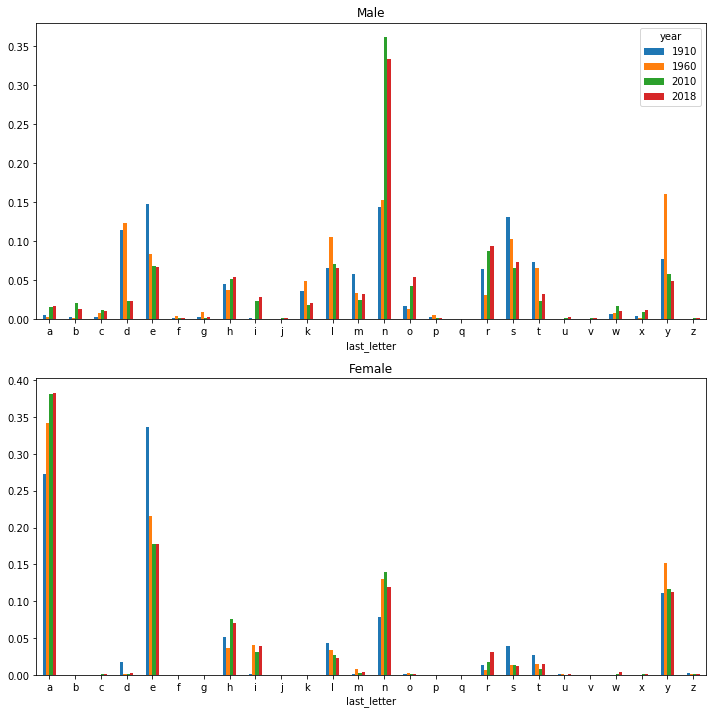

In [241]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 12))
# subplot명령으로 여러개의 그래프를 그릴 수 있다.

# 서브플롯은 그래프가 그려질 위치를 격자형으로 지정하는데, 
# plt.subplot(nrow,ncol,pos) 식으로 사용한다.

# nrow,ncol은 그래프를 그린 plain의 크기를 지정하는데, 
# 2 1 는 두칸 한줄을 의미한다.
# 그리고 마자막 pos는 몇번째 plain에 그래프를 그릴지 지정하는데, 
# 상단에서부터 시작해서
# 1
# 2
# 2, 2 형식이라면
# 1 2
# 3 4 로 진행된다.


letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                     legend=False)

# kind 그래프 모양
# rot 0 을 주면 x 축 값이 바르게 세워진다
 # rot 180 은 x 축에 있는 수 혹은 글자를 거꾸로 돌려준다. 회전정도
# ax 는 하나의 그래프 전체를 감싸는 사각형 액자를 뜻한다.
# axes 는 나타나는 그래프 객체를 뜻한다. axes 가 없으면 그래프가 없어짐


In [121]:
# 그래프에서 확인할 수 있듯이 'n' 으로 끝나는 남자아이 이름의 빈도가 1960년도 이후에
# 급격하게 증가했다. 이제 세 지점의 아닌 전체 자료에 대해 출생연도와 성별, 남자아이
# 이름에서 몇가지 글자로 정규화하고 시계열 데이터로 변환하자

In [122]:
letter_prop = table / table.sum()

In [252]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

# loc 인덱스는 df.loc[행 인덱싱값] 으로 사용한다.
# 또는 df.loc[행 인덱싱값, 열 인덱싱값]

# 이 때 인덱싱 값은 다음 중 하나이다. 
# 행 인덱싱값은 정수 또는 행 인덱스데이터이고 열 인덱싱값은 라벨 문자열이다.

#인덱스데이터
#인덱스데이터 슬라이스
#인덱스데이터 리스트
#같은 행 인덱스를 가지는 불리언 시리즈 (행 인덱싱의 경우)
#또는 위의 값들을 반환하는 함수

# loc 뒤에 선택한 값 즉, 행을 고르면 그 행이 시리즈로 출력된다.
# 즉 해당 행만 뽑아서 결과값으로 만들어준다.

# M 은 남자
# .T 로 열 과 행을 바꿔준다.

In [253]:
dny_ts.head()

last_letter,d,n,y
year,,,
1910,0.113860,0.143385,0.077343
1960,0.122935,0.152528,0.160982
2010,0.023391,0.362429,0.058192
2018,0.023098,0.333715,0.048798


In [125]:
# 이 시계열 데이터를 plot 메서드를 이용해서 연도별 그래프로 만들어보자

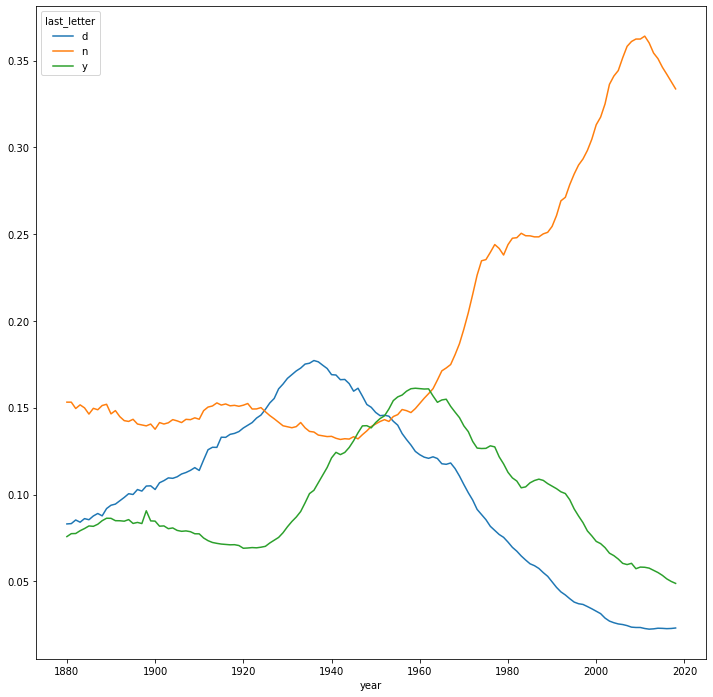

In [128]:
dny_ts.plot(figsize=(12, 12))
# d/n/y/ 로 끝나는 이름을 가진 남아의 연도별 출생 비율

In [129]:
# 남자 이름과 여자 이름이 바뀐 경우
# 또 다른 재미있는 경향은 예전에는 남자 이름으로 선호되다가 현재는 여자 이름으로 선호되는 경우
# Lesley 또는 Leslie 라는 이름이 그렇다.
# top1000 데이터를 이용해서 'lesl' 로 시작되는 이름을 포함하는 목록을 만들어보자

In [260]:
all_names = pd.Series(top1000.name.unique())
all_names
# top1000 에 있는 name 인자에서 유일값 찾기
# Series 는 해당 값에 인덱싱을 해서 결과값을 준다.
# 100년이 넘는 데이터에서 중복값들을 제외하고 unique 한 것들만 빼낸 데이턴의 값이
# 7174 개 라고 생각하면 된다.

0            Mary
1            Anna
2            Emma
3       Elizabeth
4          Minnie
          ...    
7169       Harlem
7170        Bowie
7171         Lian
7172        Kabir
7173       Korbyn
Length: 7174, dtype: object

In [267]:
all_names1 = pd.Series(all_names.value_counts())
all_names1

Effa       1
Norbert    1
Rihanna    1
Ama        1
Lassie     1
          ..
Arnett     1
Metha      1
Shannan    1
Ivah       1
Beckie     1
Length: 7174, dtype: int64

In [268]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

# all_name 의 스트링을 소문자로 바꾸고 스트링중 lesl 를 포함하는 값을 
# lesley_like 에 할당한다.

In [269]:
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6108     Lesly
dtype: object

In [133]:
# 이제 이 이름들만 걸래내서 이름별로 출생수를 구하고 상대도수를 확인해보자

In [271]:
filtered = top1000[top1000.name.isin(lesley_like)]
# top1000 이름 컬럼 값에서
# isin(값) 값에 해당하는 것만 빼내서 filtered 에 할당한다.
print(filtered)

filtered.groupby('name').births.sum()
# name 컬럼의 값들을 기준으로 births 를 더해서 하나의 데이터를 만들어 출력해준다.

          name sex  births  year      prop
632     Leslie   F       8  1880  0.000088
1108    Leslie   M      79  1880  0.000715
2461    Leslie   F      11  1881  0.000120
3014    Leslie   M      92  1881  0.000913
4512    Leslie   F       9  1882  0.000083
...        ...  ..     ...   ...       ...
268843   Lesly   F     276  2014  0.000155
270247  Leslie   F     878  2015  0.000493
272290  Leslie   F     803  2016  0.000455
274325  Leslie   F     702  2017  0.000408
276396  Leslie   F     597  2018  0.000354

[411 rows x 5 columns]


name
Leslee       993
Lesley     35033
Lesli        929
Leslie    378168
Lesly      11433
Name: births, dtype: int64

In [135]:
# 그리고 성별과 연도별로 모은 다음 출생연도로 정규화한다.

In [297]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc=sum)
# births 기준 index를 year, columns 을 성별로 하고 birht 값을 각 성별로 출력해준다.
# aggfunc 는 있어도 없어도 값이 같게 나옴
print(table)

sex        F      M
year               
1880     8.0   79.0
1881    11.0   92.0
1882     9.0  128.0
1883     7.0  125.0
1884    15.0  125.0
...      ...    ...
2014  1276.0    NaN
2015   878.0    NaN
2016   803.0    NaN
2017   702.0    NaN
2018   597.0    NaN

[139 rows x 2 columns]


In [298]:
table = table.div(table.sum(1), axis=0)

# div = 각 row 에서 column 값의 비중이 얼마인지 계산하는 방법
# sum(1) 두개의 비율이 더해서 1이 될 수 있게 했을때 비율 차이를 볼 수 있음
# axis=0 열 단위 axis=1 행 단위

# table 을 sum(1) 즉 행으로 더하고, sum(0) 은 열로 더한다.
# div 로 합한 sum 을 열로 나누어 값을 구한다.
# 예를 들어 1880 년 두개의 행을 더하면 87이고
# 87을 8과 79로 나누면 밑의 0.091954 와 0.908046 이다.
# 1을 만들어주는 값에 대한 비율을 나타내준다.



print(table)

sex          F         M
year                    
1880  0.091954  0.908046
1881  0.106796  0.893204
1882  0.065693  0.934307
1883  0.053030  0.946970
1884  0.107143  0.892857
...        ...       ...
2014  1.000000       NaN
2015  1.000000       NaN
2016  1.000000       NaN
2017  1.000000       NaN
2018  1.000000       NaN

[139 rows x 2 columns]


In [292]:
table.tail()

sex,F,M
year,,
2014,1.0,NaN
2015,1.0,NaN
2016,1.0,NaN
2017,1.0,NaN
2018,1.0,NaN


In [282]:
# 마지막으로 시대별로 성별에 따른 명세를 그래프로 그려보자

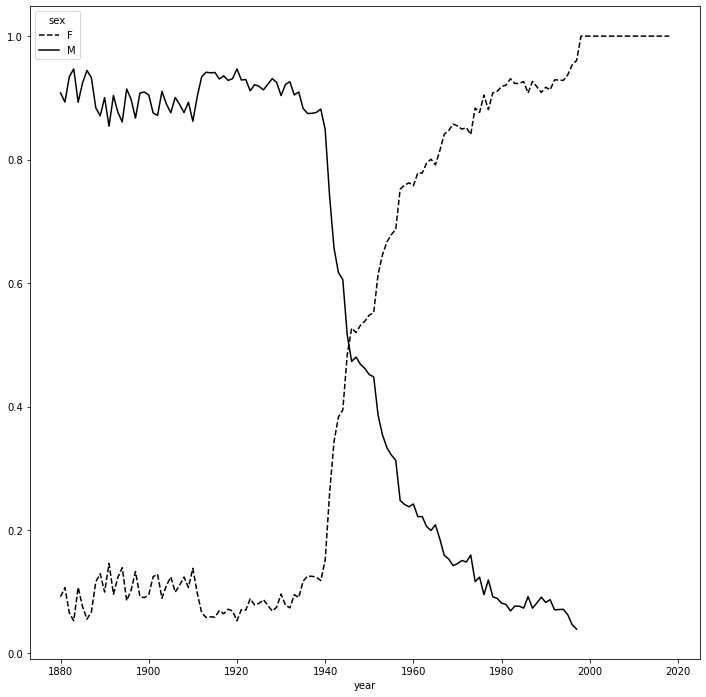

In [283]:
table.plot(style={'M':'k-', 'F': 'k--'}, figsize=(12, 12))

# style 따로 지정해줄 수 있는데, k- 는 검은 일반선을 나타내고 k-- 는 실선